In [1]:
# Constants
TRAIN_DATA_PATH = '../data/train_data.csv'
TRAIN_LABELS_PATH = '../data/train_labels.csv'
TEST_DATA_PATH = '../data/test_data.csv'

In [2]:
# Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.options.display.max_rows = 10000
warnings.filterwarnings('ignore')

In [3]:
# Read data and print shape
train_data = pd.read_csv(TRAIN_DATA_PATH, header=None)
train_labels = pd.read_csv(TRAIN_LABELS_PATH, header=None)
test_data = pd.read_csv(TEST_DATA_PATH, header=None)

print(f"Training data shape: {train_data.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Test data shape: {test_data.shape}")

Training data shape: (3750, 10000)
Training labels shape: (3750, 1)
Test data shape: (1250, 10000)


In [4]:
# Display sample data
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,-368.628,-20.998,-43561.360,-50837.137,-58284.664,-321.016,-460.117,-708.655,-361.376,-718.630,...,-45.656,-777.051,893.161,173.162,-813.174,-1517.723,130.481,1196.412,-912.865,1003.168
1,-675.786,-15.485,17229.290,38412.840,60946.580,-790.845,-189.443,269.238,-62.461,-528.154,...,230.085,-75.490,-883.604,19.226,-642.568,655.896,-96.175,-200.521,1422.708,1051.590
2,386.829,-141.141,46403.641,39583.147,-7400.224,1047.673,-187.484,372.604,263.217,-1048.317,...,-362.909,-494.809,440.159,-345.019,-1005.521,80.930,-81.016,782.287,294.108,-426.771
3,-8.509,-99.627,-46320.037,-2812.081,28036.897,-356.849,-186.106,-433.045,-340.454,-1087.733,...,1179.831,-1608.128,271.064,-650.372,56.718,-467.896,180.415,-2165.557,-12.985,398.122
4,1412.017,330.190,2504.745,-51110.910,46252.799,-218.928,-186.642,1149.771,-2.678,41.092,...,-383.297,358.533,-786.886,168.208,-226.980,-34.376,198.995,897.958,690.948,615.300


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750 entries, 0 to 3749
Columns: 10000 entries, 0 to 9999
dtypes: float64(10000)
memory usage: 286.1 MB


In [6]:
train_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
count,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,...,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000
mean,15.948697,16.209862,-349.911485,-957.507599,1612.695694,19.745413,10.689899,26.234005,-14.442098,0.917524,...,24.163625,17.393074,14.694614,13.279968,2.989212,12.759794,14.973702,3.870730,15.082835,16.587289
std,761.731396,187.413129,29996.962757,64114.734269,50925.267226,699.027551,265.269167,556.249620,530.119425,804.141603,...,556.597072,797.773349,681.246336,373.637547,594.441215,932.059743,208.472806,1000.083549,916.586961,942.876268
min,-2540.569000,-712.819000,-106509.076000,-203388.155000,-174007.702000,-2500.322000,-863.807000,-1796.703000,-1856.707000,-2644.539000,...,-2110.686000,-3183.275000,-2280.784000,-1258.403000,-1967.143000,-3368.896000,-689.099000,-3289.757000,-3079.463000,-3720.838000
25%,-493.189250,-108.428000,-21042.759000,-44796.565250,-32278.179000,-442.322250,-169.611250,-345.164250,-369.839500,-540.655250,...,-357.577500,-520.924500,-450.719500,-239.539750,-381.239250,-615.339250,-132.672000,-678.811750,-610.485500,-612.375250
50%,16.847000,13.726500,-34.858500,-328.664000,758.904000,16.042000,11.444000,35.651500,-13.903000,2.322000,...,27.749500,19.847500,15.453000,11.014000,-0.712500,20.492500,13.752000,10.932500,18.154000,3.500000
75%,532.799750,143.089000,19454.307750,41981.834000,36977.821000,493.461250,187.473750,394.836250,337.529500,541.709750,...,400.318750,557.917500,465.237500,262.414750,410.682250,623.445000,158.272250,704.194000,631.536000,626.004750
max,2867.088000,733.215000,134380.020000,209157.036000,195571.836000,2455.345000,878.709000,2144.622000,1798.558000,2854.508000,...,2052.990000,2869.997000,2639.045000,1394.660000,2208.726000,3161.756000,711.291000,3483.020000,2992.290000,3434.708000


In [7]:
# Analyze target variable
unique_labels = np.unique(train_labels)
class_counts = np.array([np.sum(train_labels == -1), np.sum(train_labels == 1)])

print(f"Unique labels: {unique_labels}")
print(f"Class distribution: {class_counts.tolist()}")


Unique labels: [-1  1]
Class distribution: [[373], [3377]]


In [8]:
print(f"Count of label -1: {np.sum(train_labels == -1)}")

Count of label -1: 0    373
dtype: int64


In [9]:
print(f"Count of label 1: {np.sum(train_labels == 1)}")

Count of label 1: 0    3377
dtype: int64


In [10]:
y_train = train_labels.values.ravel()

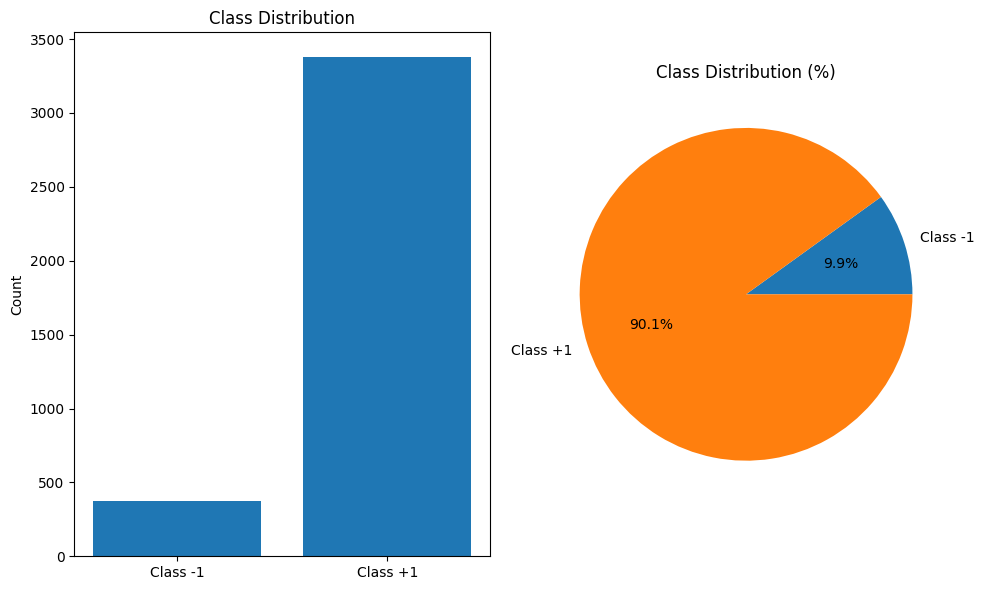

In [11]:
# Visualize class distribution
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.bar(['Class -1', 'Class +1'], [np.sum(y_train == -1), np.sum(y_train == 1)])
plt.title('Class Distribution')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.pie([np.sum(y_train == -1), np.sum(y_train == 1)], 
        labels=['Class -1', 'Class +1'], autopct='%1.1f%%')
plt.title('Class Distribution (%)')

plt.tight_layout()
plt.show()

In [12]:
# Feature analysis
feature_means = train_data.mean()
feature_stds = train_data.std()
feature_vars = train_data.var()

print("Feature Statistics:")
print(f"Mean feature variance: {feature_vars.mean():.3f}")
print(f"Mean feature mean: {feature_means.mean():.3f}")
print(f"Features with zero variance: {(feature_vars == 0).sum()}")
print(f"Features with very low variance (<0.01): {(feature_vars < 0.01).sum()}")

Feature Statistics:
Mean feature variance: 3130424.963
Mean feature mean: 23.652
Features with zero variance: 0
Features with very low variance (<0.01): 0
